In [1]:
# Import Libraries:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Import necessary machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('Data_Real.csv')
# Display first few rows
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [3]:
df.columns

Index(['city', 'district', 'front', 'size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room',
       'maid_room', 'furnished', 'ac', 'roof', 'pool', 'frontyard', 'basement',
       'duplex', 'stairs', 'elevator', 'fireplace', 'price', 'details'],
      dtype='object')

In [4]:
df['city'].nunique()

4

In [5]:
df['district'].nunique()

174

In [6]:
df['front'].nunique()

10

In [7]:
df['details'].nunique()

1429

In [8]:
# Drop below columns since we don't need them 
# details, front, district

# Drop the specified columns from the DataFrame
df.drop(['details', 'city', 'front', 'district'], axis=1, inplace=True)

# Display the DataFrame to confirm the columns have been dropped
# print(df.head())


In [9]:
# Check data types and summary statistics
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   size          3718 non-null   int64
 1   property_age  3718 non-null   int64
 2   bedrooms      3718 non-null   int64
 3   bathrooms     3718 non-null   int64
 4   livingrooms   3718 non-null   int64
 5   kitchen       3718 non-null   int64
 6   garage        3718 non-null   int64
 7   driver_room   3718 non-null   int64
 8   maid_room     3718 non-null   int64
 9   furnished     3718 non-null   int64
 10  ac            3718 non-null   int64
 11  roof          3718 non-null   int64
 12  pool          3718 non-null   int64
 13  frontyard     3718 non-null   int64
 14  basement      3718 non-null   int64
 15  duplex        3718 non-null   int64
 16  stairs        3718 non-null   int64
 17  elevator      3718 non-null   int64
 18  fireplace     3718 non-null   int64
 19  price         3718 non-null

In [10]:
# print(df.describe())

In [11]:
df.shape

(3718, 20)

In [12]:
df.columns

Index(['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms',
       'kitchen', 'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
       'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator',
       'fireplace', 'price'],
      dtype='object')

In [13]:
# Check for missing values
print(df.isnull().sum())

size            0
property_age    0
bedrooms        0
bathrooms       0
livingrooms     0
kitchen         0
garage          0
driver_room     0
maid_room       0
furnished       0
ac              0
roof            0
pool            0
frontyard       0
basement        0
duplex          0
stairs          0
elevator        0
fireplace       0
price           0
dtype: int64


### Handling missing values

In [14]:
# # Calculate the mean of non-missing values in the 'details' column
# mean_details = df['details'].mean()

# # Replace missing values in the 'details' column with the mean
# df['details'].fillna(mean_details, inplace=True)

# # Check if missing values have been replaced
# print(df.isnull().sum())


In [15]:
# Check for duplicate entries
print(df.duplicated().sum())

2210


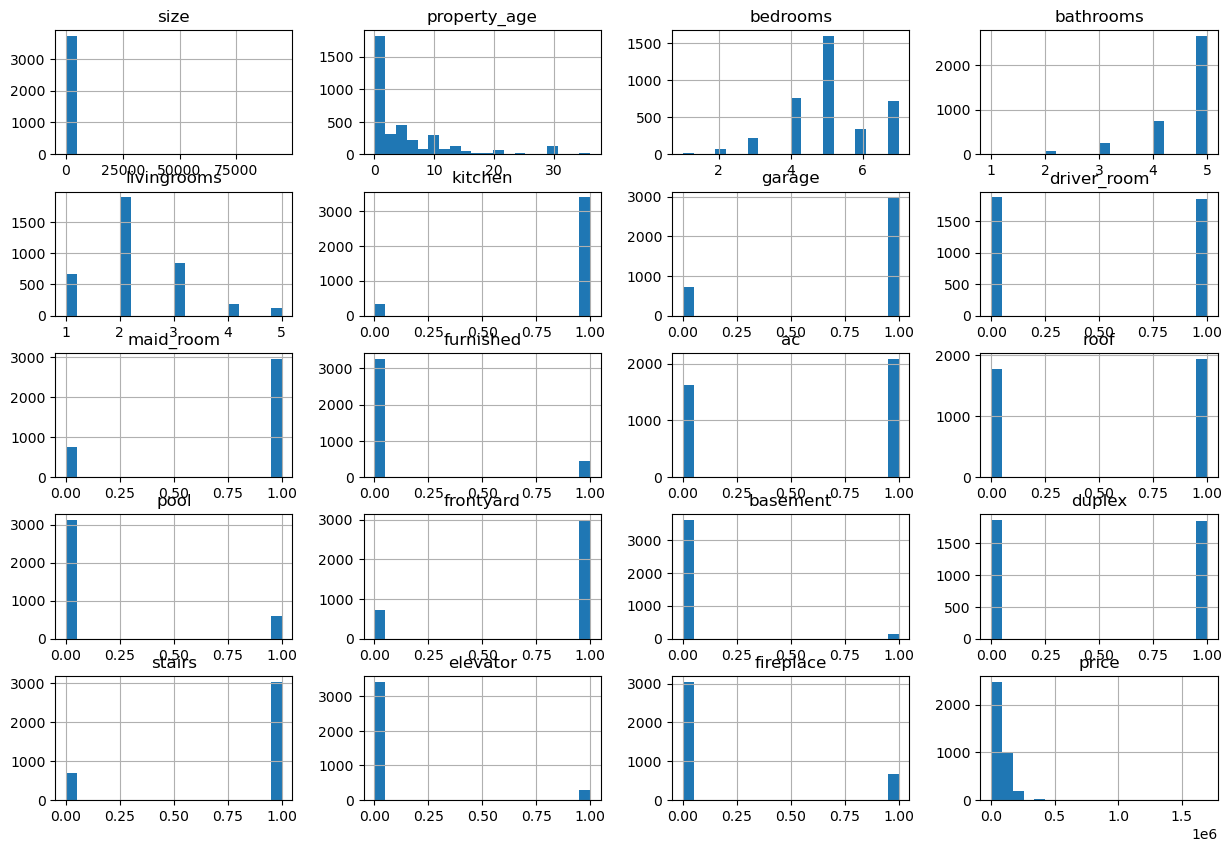

In [16]:
# Visualize distributions of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

##### We need to select the features based on hitogram distribution


In [17]:
# Dope: 
# For now let's just keep all and see the result

<Axes: xlabel='size', ylabel='price'>

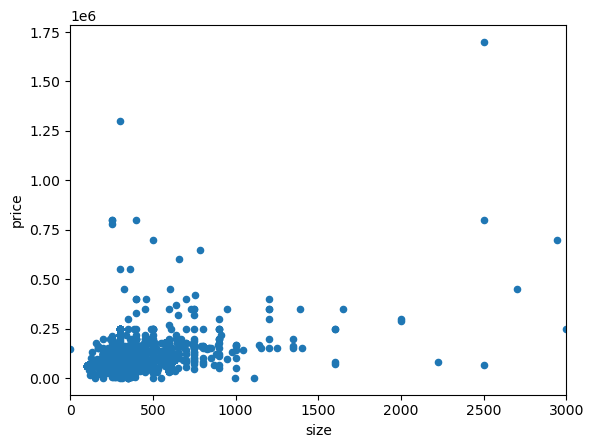

In [18]:
# checking correlation of price with the property size?
df.plot(x='size', y='price', kind="scatter", xlim=(0, 3000))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3684\2357701031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Skewness: 7.690328
Kurtosis: 118.677936


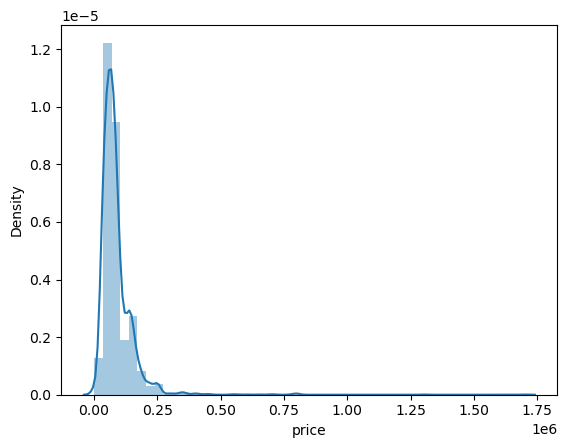

In [19]:
sns.distplot(df['price'])
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

As we see, the feature price is not normally distributed. This can reduce the performance of the ML regression models because some assume normal distribution, see sklearn info on preprocessing Therfore we make a log transformation, the resulting distribution looks much better.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3684\4190895927.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_log'])


Skewness: -0.629277
Kurtosis: 6.656317


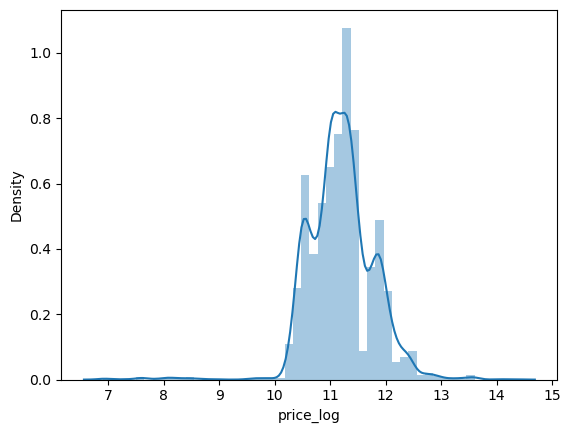

In [20]:
df['price_log'] = np.log(df['price'])
sns.distplot(df['price_log'])
# skewness and kurtosis
print("Skewness: %f" % df['price_log'].skew())
print("Kurtosis: %f" % df['price_log'].kurt())

In [21]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['int', 'float'])
cor = numeric_df.corr()
cor

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,price_log
size,1.000000,0.026605,-0.001659,-0.020684,-0.003165,-0.002841,0.026136,0.050188,-0.019671,0.000228,...,-0.005264,0.037103,0.024471,0.019690,-0.010833,0.009946,0.004103,0.014135,0.055199,0.046363
property_age,0.026605,1.000000,0.019242,-0.015376,0.045143,0.113298,-0.115827,0.229479,0.123351,-0.086590,...,-0.051128,-0.067364,0.040116,0.065122,-0.212236,0.059045,-0.061000,0.017599,0.156226,0.206898
bedrooms,-0.001659,0.019242,1.000000,0.428383,0.117873,-0.117855,0.180438,-0.001162,0.136515,-0.035578,...,0.260171,-0.233998,0.226132,-0.018852,0.059557,0.105136,0.068742,0.309624,-0.055860,-0.034133
bathrooms,-0.020684,-0.015376,0.428383,1.000000,0.407682,-0.064741,0.207669,0.212013,0.281067,-0.170169,...,0.208967,-0.201461,0.264357,0.048366,0.145092,0.229664,0.102957,0.025026,0.039583,0.121091
livingrooms,-0.003165,0.045143,0.117873,0.407682,1.000000,-0.017165,0.073331,0.308451,0.081950,-0.135604,...,0.149828,-0.015394,0.179971,0.143856,0.004689,-0.012590,0.182475,-0.081845,0.163844,0.200141
kitchen,-0.002841,0.113298,-0.117855,-0.064741,-0.017165,1.000000,0.003030,0.063800,0.053458,0.112787,...,-0.082984,0.121265,-0.095389,0.038742,-0.072476,-0.030222,0.059358,-0.045981,0.086546,0.083085
garage,0.026136,-0.115827,0.180438,0.207669,0.073331,0.003030,1.000000,0.204983,0.249873,0.092054,...,0.156525,0.026654,0.262338,0.067415,0.104766,0.049328,0.125179,0.109371,0.075580,0.109374
driver_room,0.050188,0.229479,-0.001162,0.212013,0.308451,0.063800,0.204983,1.000000,0.314959,-0.038470,...,0.091367,0.021291,0.159256,0.139336,-0.151171,0.110739,0.192867,-0.028066,0.297801,0.406191
maid_room,-0.019671,0.123351,0.136515,0.281067,0.081950,0.053458,0.249873,0.314959,1.000000,0.046504,...,0.098584,-0.109109,0.121861,0.069712,-0.042543,0.272245,0.121239,-0.007001,0.188361,0.307609
furnished,0.000228,-0.086590,-0.035578,-0.170169,-0.135604,0.112787,0.092054,-0.038470,0.046504,1.000000,...,-0.018620,0.284684,0.058777,0.005948,-0.106705,-0.073224,0.086449,0.020782,0.157764,0.134107


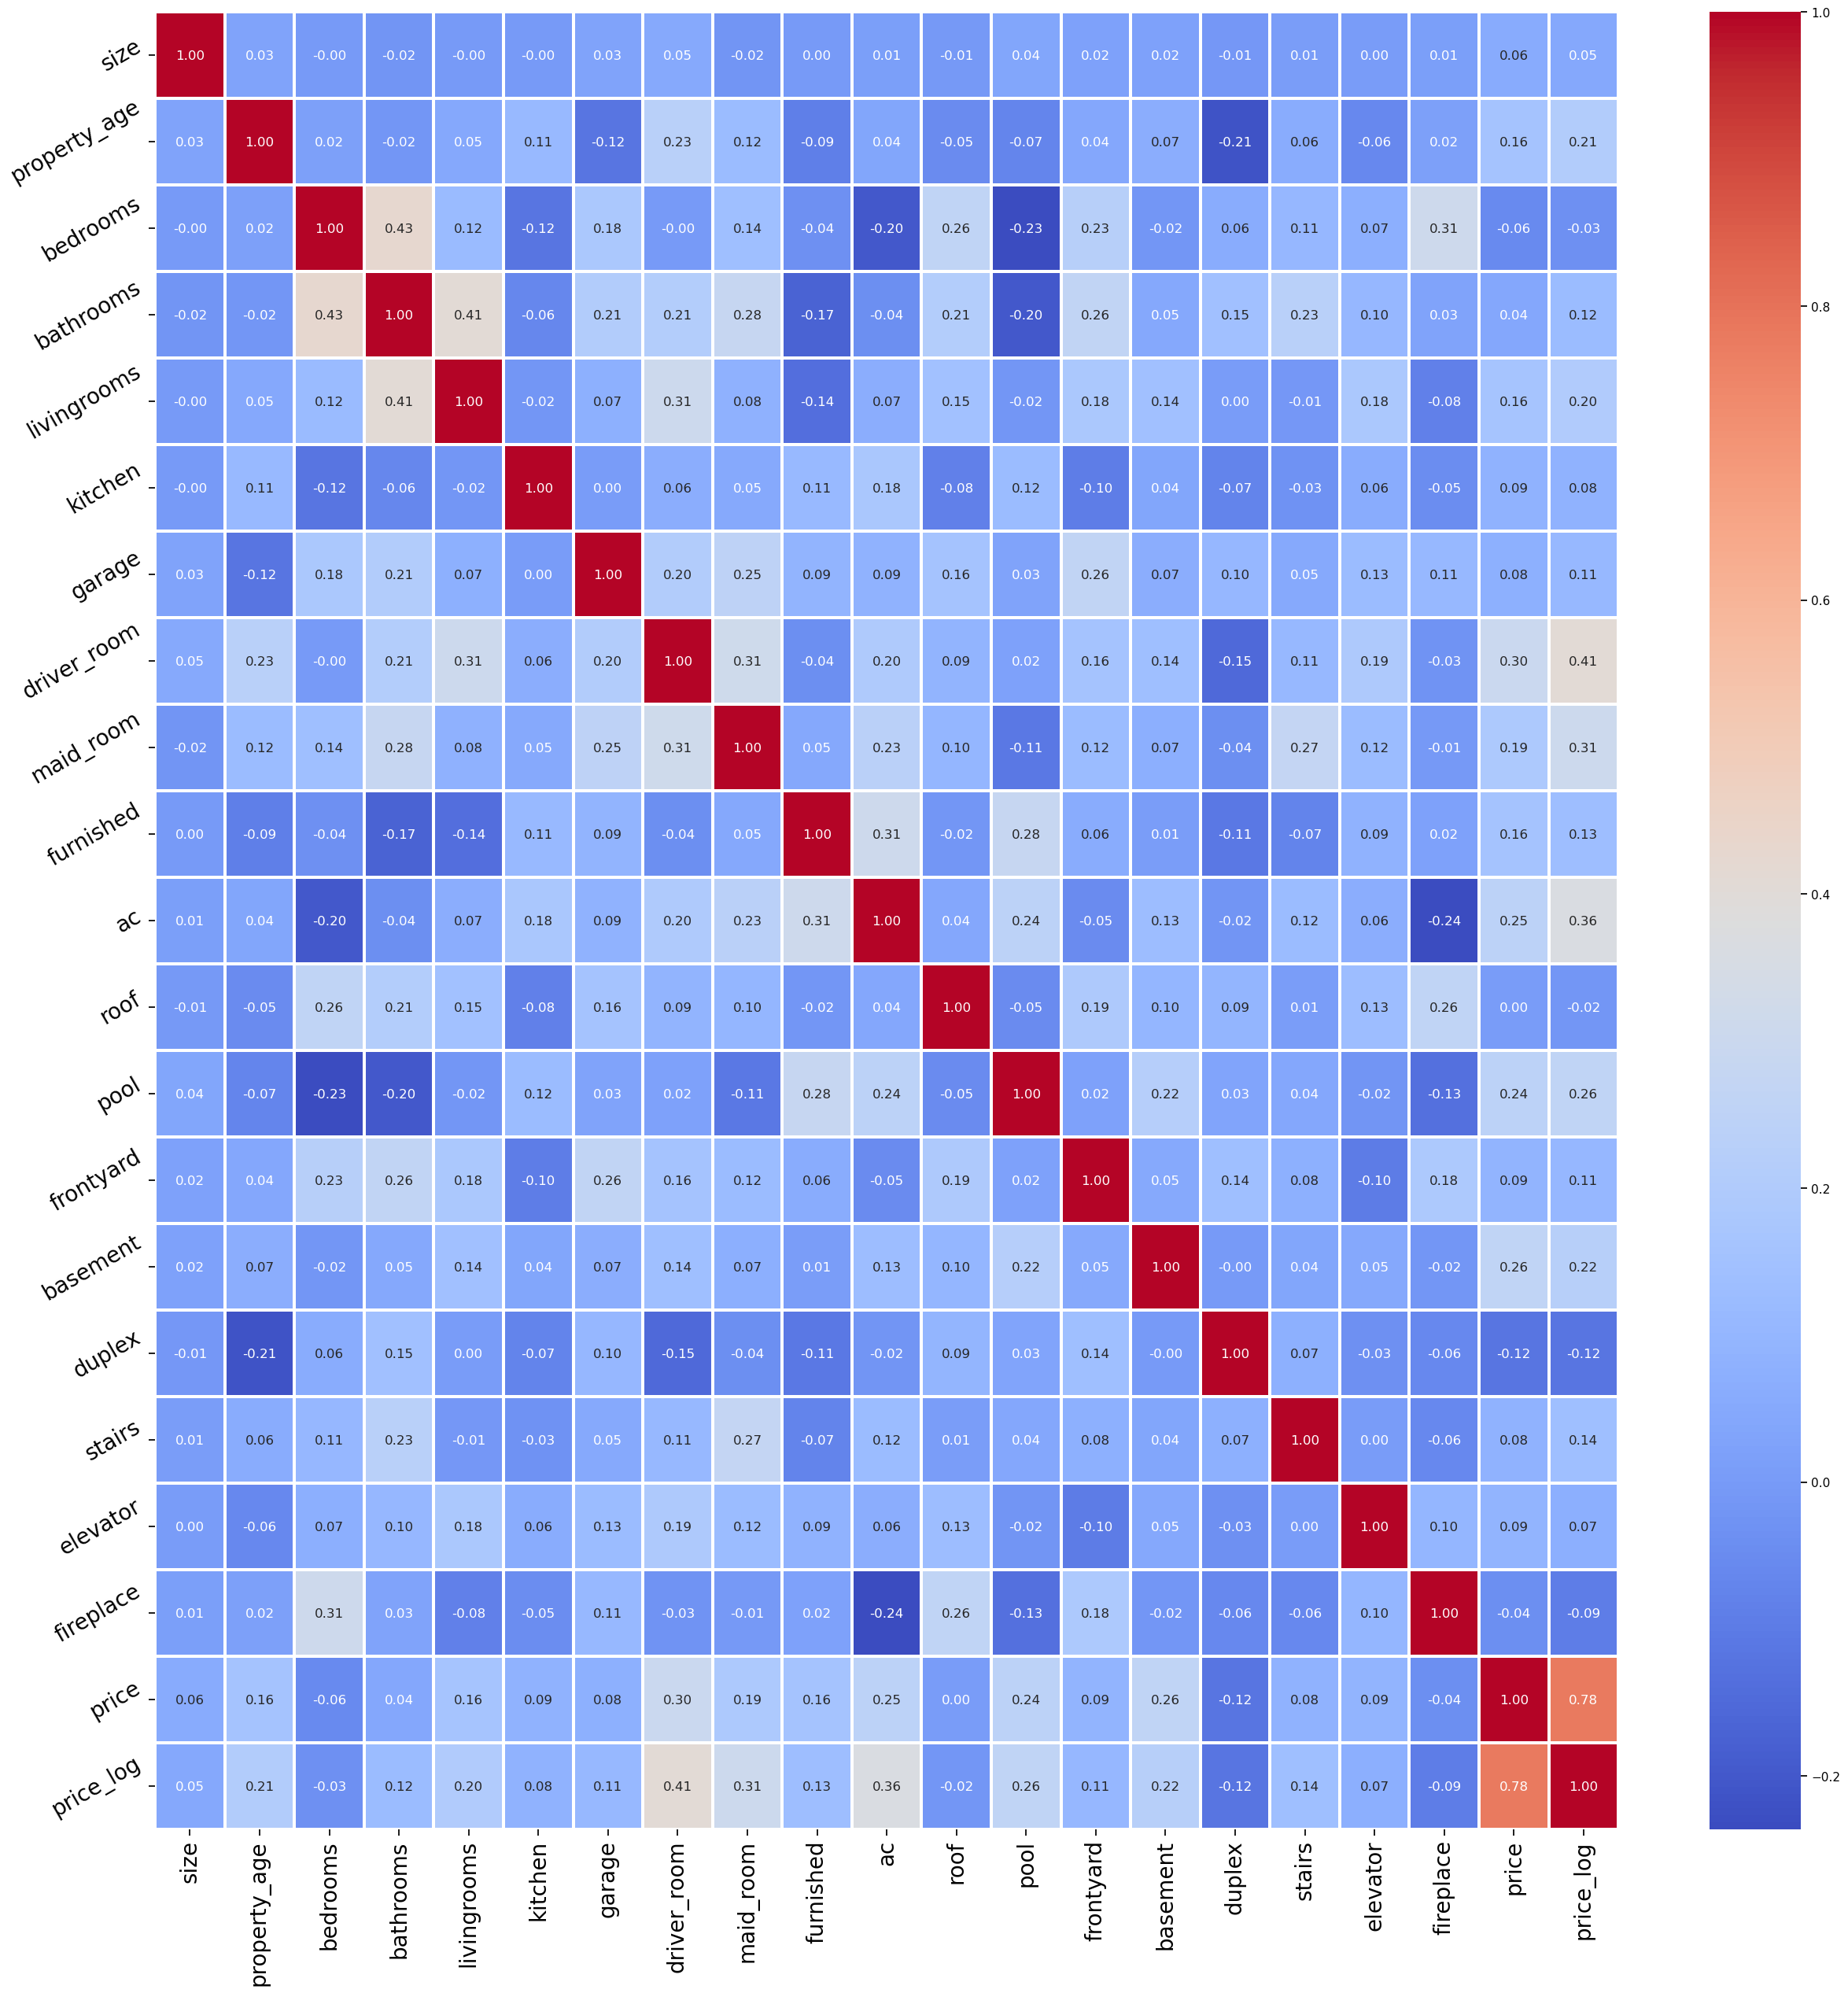

In [22]:
# heatmap of correlation among various attributes

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(30,30))
p = sns.heatmap(cor, annot=True, lw=1.5, fmt='.2f', cmap='coolwarm')
rotxlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':20}, rotation=90)
rotylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':20}, rotation=30)

In [23]:
strongAttributes = cor.nlargest(10, 'price')['price'].index

In [24]:
# g = sns.PairGrid(data = df[strongAttributes])
# g.map_diag(sns.distplot, color= 'purple')
# g.map_upper(plt.scatter, color= 'red')
# g.map_lower(sns.kdeplot, color= 'blue')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3684\1651133766.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color = 'blue', kde= False, norm_hist= True )


<Axes: xlabel='price'>

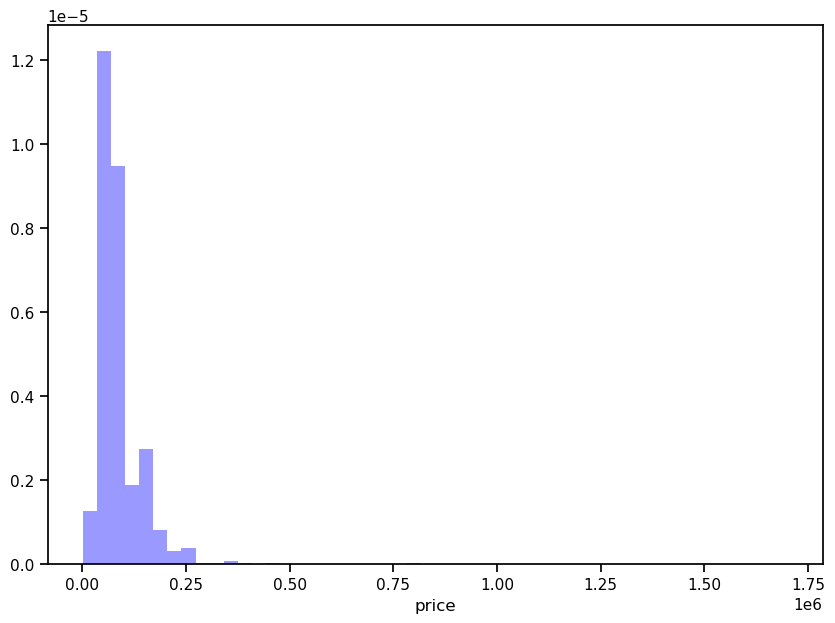

In [25]:
plt.subplots(figsize=(10,7))
sns.distplot(df['price'],color = 'blue', kde= False, norm_hist= True )

In [26]:
# plt.subplots(figsize=(10,7))
# df['front'].value_counts().plot(kind='barh')

In [27]:
# df.city.value_counts(normalize=True)

# #plot the bar graph of percentage job categories
# df.city.value_counts(normalize=True).plot.barh()
# plt.show()

In [28]:
# plt.subplots(figsize=(10,7))

# #calculate the percentage of each education category.
# df.front.value_counts(normalize=True)

# #plot the pie chart of education categories
# df.front.value_counts(normalize=True).plot.pie()
# plt.show()

In [29]:
# import pickle

# # Create a mapping of Arabic city names to numerical values
# city_map = {city: idx for idx, city in enumerate(df['city'].unique())}

# X_mapped = X.copy()
# X_mapped['city'] = X_mapped['city'].map(city_map)

# # Split the dataset into features and target variable
# X = X_mapped
# y = df['price']

# # Dump the city mapping into a pickle file
# with open('city_mapping.pkl', 'wb') as f:
#     pickle.dump(city_map, f)

# # Display the first few rows of the new DataFrame
# print(X.head())

In [30]:
# Split the dataset into features and target variable
X = df.drop('price', axis=1)
y = df['price']

In [31]:
# import pickle
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'city' column
# X['city'] = label_encoder.fit_transform(X['city'])

# # Dump the label encoding mapping into a pickle file
# label_encoding_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# with open('label_encoding_map.pkl', 'wb') as f:
#     pickle.dump(label_encoding_map, f)

In [32]:
# # Read the pickle file containing the label encoding mapping
# with open('label_encoding_map.pkl', 'rb') as f:
#     label_encoding_map = pickle.load(f)

# # Print a few contents of the label encoding mapping
# print("Label Encoding Mapping:")
# for key, value in list(label_encoding_map.items())[:5]:  # Print the first 5 items
#     print(f"{key}: {value}")

In [33]:
# X = X
# y = y

# # Display the first few rows of the new DataFrame
# print(X.head())

In [34]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection and Evaluation:

In [35]:
# Initialize models
linear_reg = LinearRegression()


In [36]:
# Train the models
linear_reg.fit(X_train, y_train)


LinearRegression()

In [37]:
from sklearn.metrics import accuracy_score, f1_score, r2_score

y_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: -22.3016775332081


In [38]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 28081.259538371607


### Decision Tree

In [39]:
decision_tree_reg = DecisionTreeRegressor()

In [40]:
decision_tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

### Performance Metrics

In [41]:
# Make predictions
y_pred = decision_tree_reg.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Absolute Error (MAE): 185.3561827956989
Mean Squared Error (MSE): 5211707.022849462
R-squared Score: 0.9986270170583241


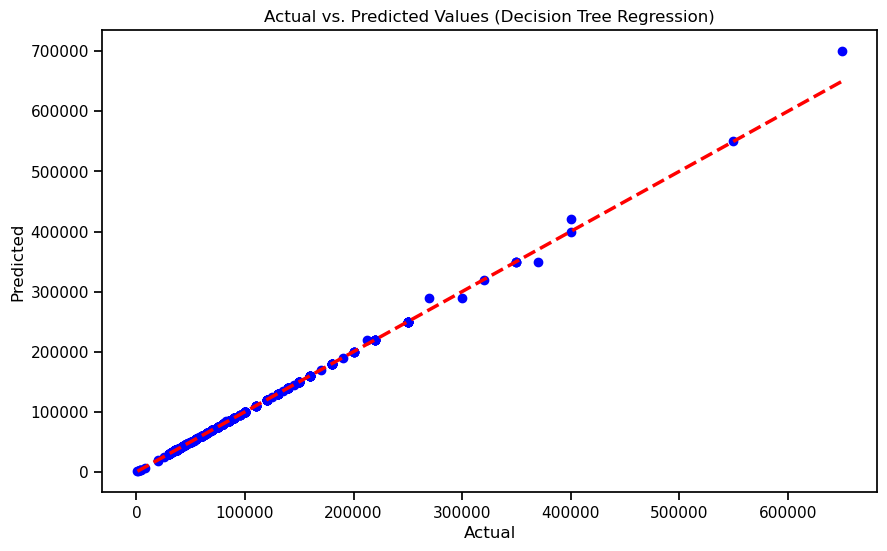

In [42]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Decision Tree Regression)')
plt.show()

### Random Forest Regressor

In [43]:
random_forest_reg = RandomForestRegressor()

random_forest_reg.fit(X_train, y_train)


RandomForestRegressor()

### Performance Metric

In [44]:
# Make predictions
y_pred = random_forest_reg.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 255.37623655913976
Mean Squared Error (MSE): 10292971.19037043
R-squared Score: 0.9972883982538577


In [45]:
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

# Assuming Random Forest model (random_forest_reg) is already trained and X_train, y_train are available

# Train the Random Forest model
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

# Save the trained model to a .h5 file
dump(random_forest_reg, 'random_forest_model.h5')


['random_forest_model.h5']

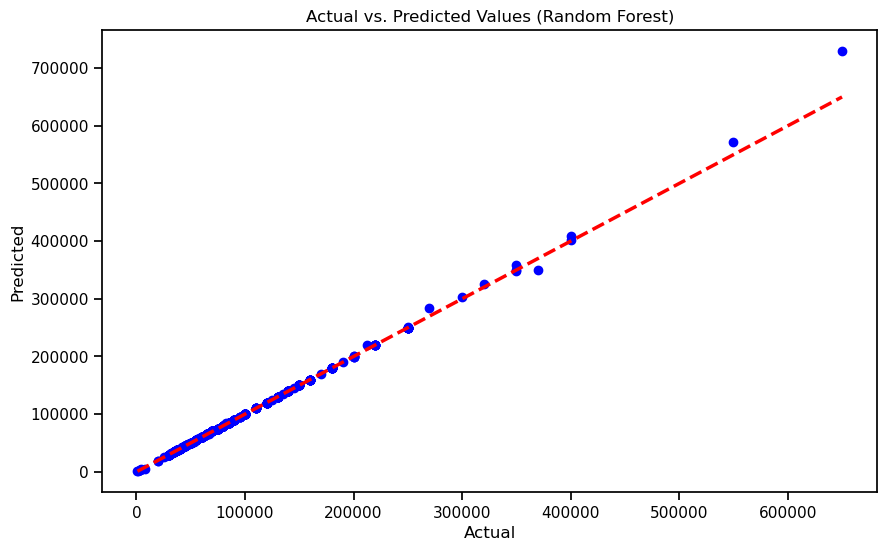

In [46]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()

### Support Vector Machine

In [47]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

Mean Absolute Error (MAE): 38473.60272656875
Mean Squared Error (MSE): 4094294636.296077
R-squared Score (R2): -0.0786094976528946


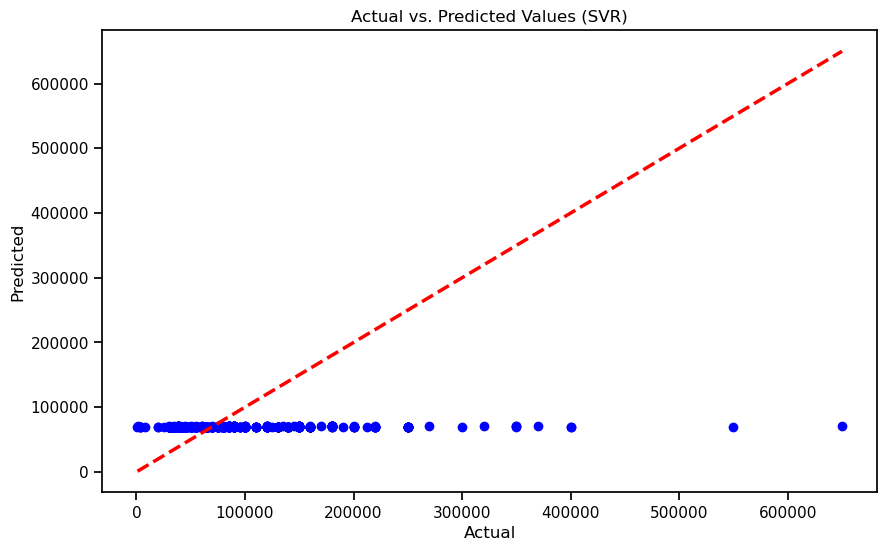

In [48]:
# Make predictions
y_pred = svr.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (SVR)')
plt.show()